In [1]:
import sys
sys.path.append("..")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021


In [2]:
from sklearn.linear_model import LinearRegression
from DataPrep.ImportData import importer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from Modelling import modelling
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log
import numpy as np
import pandas as pd
from DataPrep.ImportData import importer
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [3]:

m = modelling(shuffle=False)

In [3]:
y_org = importer().Import()[["Start Date","Energy (kWh)","Label"]]

In [4]:
y_org=y_org[y_org["Start Date"].dt.year==2016]
y_org.index=y_org["Start Date"]
y_org=y_org.drop(columns=["Start Date"])
y_org=y_org[y_org["Label"]==0]
y_org=y_org.drop(columns=["Label"])
y_org

,Energy (kWh)
Start Date,
2016-01-01,2.707379
2016-01-02,4.738530
2016-01-03,2.849014
2016-01-04,6.069899
2016-01-05,4.148760
...,...
2016-12-27,6.194208
2016-12-28,5.508056
2016-12-29,5.710154


In [5]:
y_org=y_org[y_org<=12.5]
y_org.dropna()

,Energy (kWh)
Start Date,
2016-01-01,2.707379
2016-01-02,4.738530
2016-01-03,2.849014
2016-01-04,6.069899
2016-01-05,4.148760
...,...
2016-12-27,6.194208
2016-12-28,5.508056
2016-12-29,5.710154


Energy (kWh)    3
dtype: int64

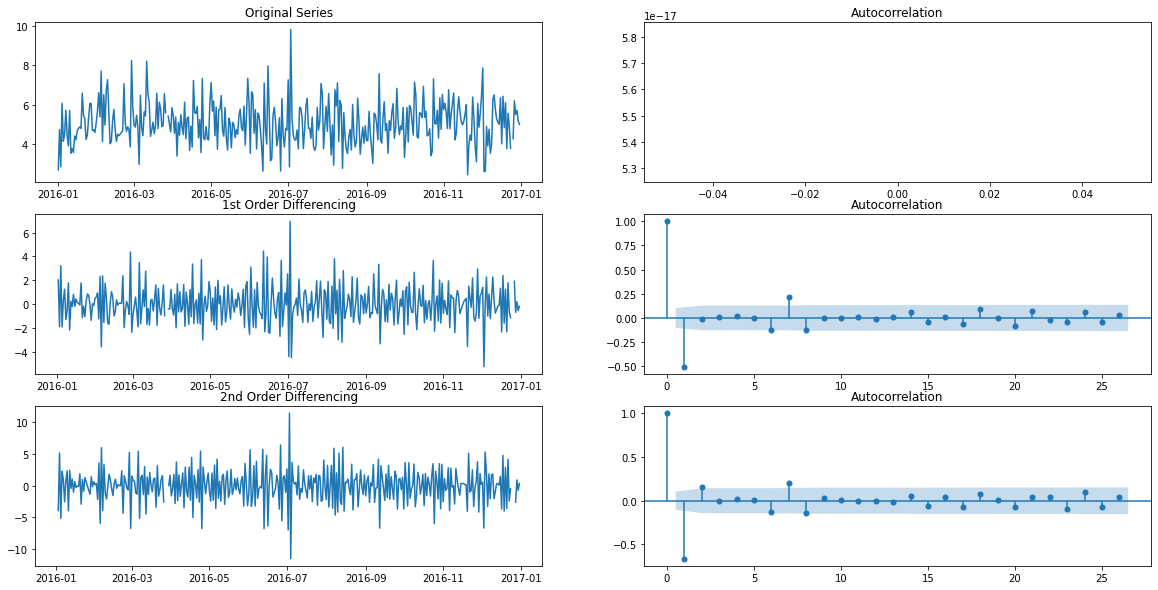

In [6]:
# Original Series

fig, axes = plt.subplots(3, 2, sharex=False,figsize=(20,10))
axes[0, 0].plot(y_org); axes[0, 0].set_title('Original Series')
plot_acf(y_org, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y_org.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y_org.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y_org.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y_org.diff().diff().dropna(), ax=axes[2, 1])
plt.show()


In [7]:

result = adfuller(y_org.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -19.483382
p-value: 0.000000


In [8]:
model = pm.auto_arima(y_org.dropna(), start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=52,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=62.61 sec
 ARIMA(0,0,0)(0,1,0)[52] intercept   : AIC=1170.260, Time=0.54 sec
 ARIMA(1,0,0)(1,1,0)[52] intercept   : AIC=1104.422, Time=8.92 sec
 ARIMA(0,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=15.86 sec
 ARIMA(0,0,0)(0,1,0)[52]             : AIC=1168.292, Time=0.18 sec
 ARIMA(1,0,0)(0,1,0)[52] intercept   : AIC=1172.207, Time=1.26 sec
 ARIMA(1,0,0)(2,1,0)[52] intercept   : AIC=1084.170, Time=17.78 sec
 ARIMA(1,0,0)(2,1,1)[52] intercept   : AIC=inf, Time=85.84 sec
 ARIMA(1,0,0)(1,1,1)[52] intercept   : AIC=inf, Time=39.54 sec
 ARIMA(0,0,0)(2,1,0)[52] intercept   : AIC=1082.378, Time=12.68 sec
 ARIMA(0,0,0)(1,1,0)[52] intercept   : AIC=1102.471, Time=6.69 sec
 ARIMA(0,0,0)(2,1,1)[52] intercept   : AIC=inf, Time=95.72 sec
 ARIMA(0,0,0)(1,1,1)[52] intercept   : AIC=inf, Time=60.18 sec
 ARIMA(0,0,1)(2,1,0)[52] intercept   : AIC=1084.174, Time=16.66 sec
 ARIMA(1,0,1)(2,1,0)[52] intercept   : A

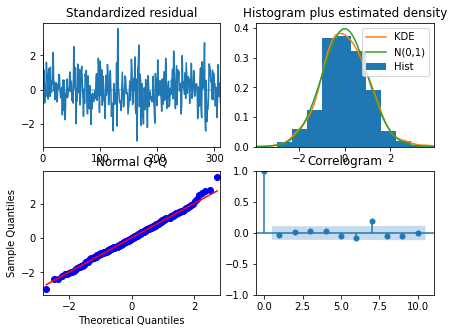

In [9]:
model.plot_diagnostics(figsize=(7,5))
plt.show()